<a href="https://colab.research.google.com/github/bpandey369/CODSOFT/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = 'https://raw.githubusercontent.com/bpandey369/Datasets/main/Titanic-Dataset.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

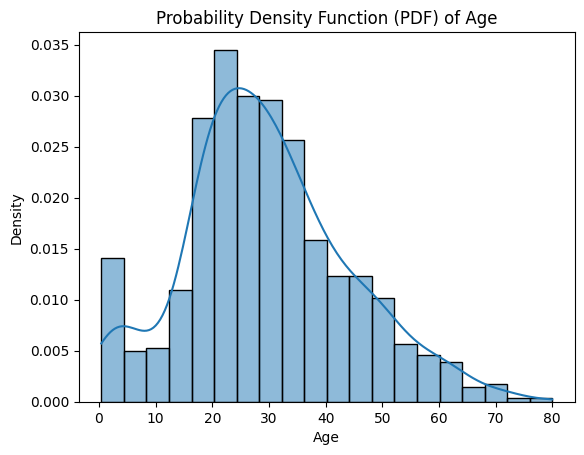

In [11]:
sns.histplot(df['Age'], kde=True, stat='density', bins=20)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Probability Density Function (PDF) of Age')
plt.show()

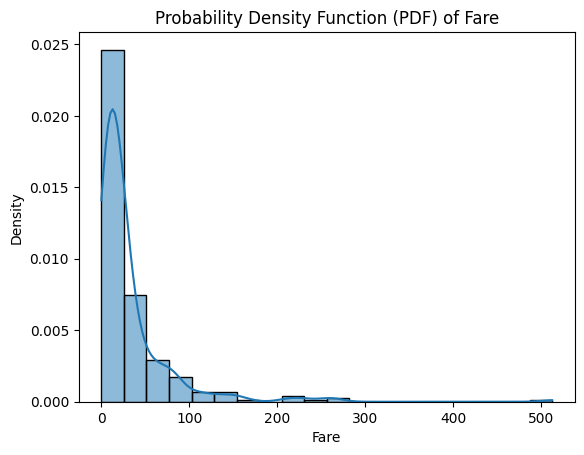

In [12]:
sns.histplot(df['Fare'], kde=True, stat='density', bins=20)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Probability Density Function (PDF) of Fare')
plt.show()

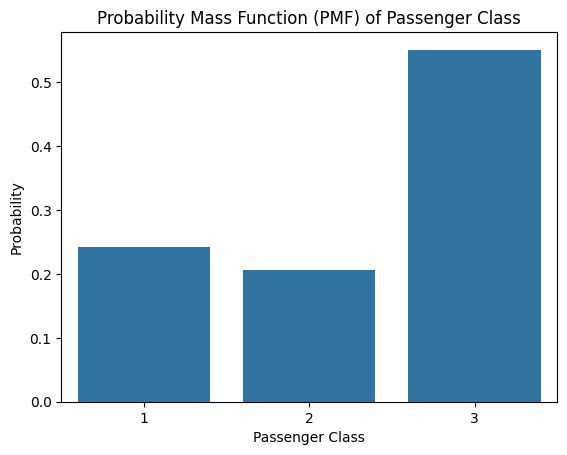

In [13]:
sns.barplot(x=df['Pclass'].value_counts().index, y=df['Pclass'].value_counts(normalize=True))
plt.xlabel('Passenger Class')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) of Passenger Class')
plt.show()

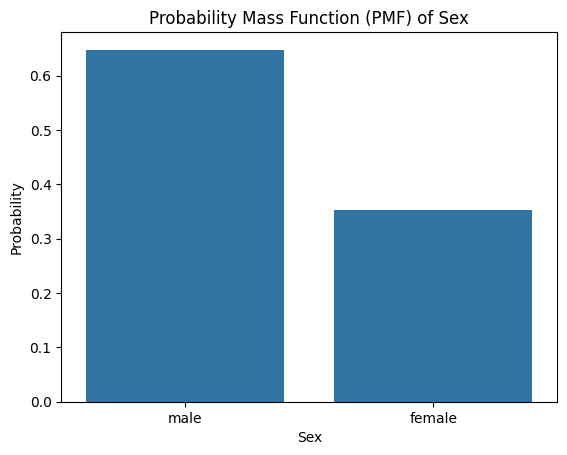

In [14]:
sns.barplot(x=df['Sex'].value_counts().index, y=df['Sex'].value_counts(normalize=True))
plt.xlabel('Sex')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) of Sex')
plt.show()

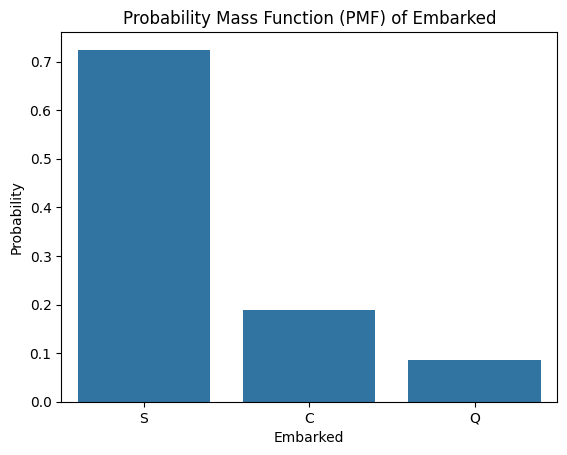

In [15]:
sns.barplot(x=df['Embarked'].value_counts().index, y=df['Embarked'].value_counts(normalize=True))
plt.xlabel('Embarked')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) of Embarked')
plt.show()

In [16]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [18]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S


In [19]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
707,1,male,42.0,0,0,26.2875,S
37,3,male,21.0,0,0,8.0500,S
615,2,female,24.0,1,2,65.0000,S
169,3,male,28.0,0,0,56.4958,S
68,3,female,17.0,4,2,7.9250,S


In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [21]:
df['FamilySize'] = df['SibSp'] + df['Parch']

In [22]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])


In [23]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,1,0,0,0,1
888,0,3,NaN,1,2,23.4500,3,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,0,1,1,0,0


In [24]:
df.drop(['SibSp','Parch','Sex_female', 'Embarked_C'],axis=1,inplace=True)

In [25]:
df.isnull().sum()

Survived        0
Pclass          0
Age           177
Fare            0
FamilySize      0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [26]:
from sklearn.impute import SimpleImputer
age_imputer = SimpleImputer(strategy='mean')
df['Age'] = age_imputer.fit_transform(df[['Age']])

In [27]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
X_train

,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
30,1,40.000000,27.7208,0,1,0,0
10,3,4.000000,16.7000,2,0,0,1
873,3,47.000000,9.0000,0,1,0,1
182,3,9.000000,31.3875,6,1,0,1
876,3,20.000000,9.8458,0,1,0,1
...,...,...,...,...,...,...,...
534,3,30.000000,8.6625,0,0,0,1
584,3,29.699118,8.7125,0,1,0,0
493,1,71.000000,49.5042,0,1,0,0
527,1,29.699118,221.7792,0,1,0,1


In [30]:
X_test

,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
707,1,42.000000,26.2875,0,1,0,1
37,3,21.000000,8.0500,0,1,0,1
615,2,24.000000,65.0000,3,0,0,1
169,3,28.000000,56.4958,0,1,0,1
68,3,17.000000,7.9250,6,0,0,1
...,...,...,...,...,...,...,...
89,3,24.000000,8.0500,0,1,0,1
80,3,22.000000,9.0000,0,1,0,1
846,3,29.699118,69.5500,10,1,0,1
870,3,26.000000,7.8958,0,1,0,1


In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
predict = lr.predict(X_test)

In [33]:
predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, predict)
print("Accuracy:", accuracy)



Accuracy: 0.7821229050279329


In [35]:

precision = precision_score(y_test, predict)
print("Precision:", precision)



Precision: 0.8225806451612904


In [36]:

recall = recall_score(y_test, predict)
print("Recall:", recall)



Recall: 0.6455696202531646


In [37]:

f1 = f1_score(y_test, predict)
print("F1-score:", f1)


F1-score: 0.723404255319149


In [38]:


roc_auc = roc_auc_score(y_test, predict)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.7677848101265822
